In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [226]:
#this function returns the max value for the given matrix
def get_Max(matrix):
    largest_num = matrix[0][0]
    for row_idx, row in enumerate(matrix):
        for col_idx, num in enumerate(row):
            if num > largest_num:
                largest_num = num

    return largest_num

#This function normalises the image matrix to 0-255 scale
def Normalise_Matrix(Matrix):
    row = len(Matrix)
    col = len(Matrix[0])
    MAX_VALUE = get_Max(Matrix)
    for i in range(row):
        for j in range(col):
            Matrix[i][j] = (Matrix[i][j]/MAX_VALUE)*255
    return Matrix

#This function generates a matrix with given row,col size filled with zeros
def initialise_matrix(row, col):
    matrix = [[0 for x in range(col)] for y in range(row)]
    return matrix

# funtion to get 3*3 matrix based on its position
def get_3_cross3(matrix, row, col):
    MAT = initialise_matrix(3, 3)
    if row == 0 or col == 0:
        MAT[0][0] = 0
    else:
        MAT[0][0] = matrix[row-1][col-1]

    if row == 0:
        MAT[0][1] = 0
    else:
        MAT[0][1] = matrix[row-1][col]

    if row == 0 or col == len(matrix[0])-1:
        MAT[0][2] = 0
    else:
        MAT[0][2] = matrix[row-1][col+1]

    if col == 0:
        MAT[1][0] = 0
    else:
        MAT[1][0] = matrix[row][col-1]

    MAT[1][1] = matrix[row][col]

    if col == len(matrix[0])-1:
        MAT[1][2] = 0
    else:
        MAT[1][2] = matrix[row][col+1]

    if row == len(matrix)-1 or col == 0:
        MAT[2][0] = 0
    else:
        MAT[2][0] = matrix[row+1][col-1]

    if row == len(matrix)-1:
        MAT[2][1] = 0
    else:
        MAT[2][1] = matrix[row+1][col]

    if row == len(matrix)-1 or col == len(matrix[0])-1:
        MAT[2][2] = 0
    else:
        MAT[2][2] = matrix[row+1][col+1]

    return MAT

#this function pads 0 for the edge rows and cols
def generatePatchMatrix(matrix, row, col):
    PATCH_MAT = initialise_matrix(5, 5)
    row_i = row - 2
    for i in range(5):
        col_i = col - 2
        for j in range(5):
            if row_i < 0 or row_i > len(matrix)-1 or col_i < 0 or col_i > len(matrix[0])-1:
                PATCH_MAT[i][j] = 0
            else:
                PATCH_MAT[i][j] = matrix[row_i][col_i]
            col_i = col_i + 1

        if i > 4:
            row_i = row - 2
        else:
            row_i = row_i + 1
    return PATCH_MAT


# this function does element wise multiplication of the given 2 matrices
def elem_wise_operation(kernel, pos,size):
    op = initialise_matrix(size, size)
    op = np.multiply(kernel,pos)
    return op

# this function returns the sum of all the values in a matrix
def sum_of_elems(MAT):
    value = 0
    row = len(MAT)
    col = len(MAT[0])
    for i in range(row):
        for j in range(col):
            value = value + MAT[i][j]
    return value

def mask_Input_Image(image):
    op_mat = initialise_matrix(len(image), len(image[0]))
    for i in range(len(image)):
        for j in range(len(image[0])):
            pos_mat = get_3_cross3(image, i, j)
            computed_mat = np.multiply(pos_mat, kernel)
            op_mat[i][j] = sum_of_elems(computed_mat)
    return op_mat

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
(766, 571)
mask image generated


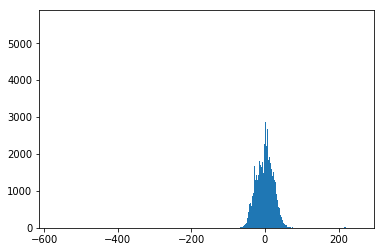

In [290]:
#Color_image = cv2.imread('original_imgs/point.jpg')
img = cv2.imread('original_imgs/turbine-blade.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('original_imgs/point.jpg',0)
kernel = [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]
kernel = np.array(kernel)
print(kernel)
print(img.shape)

mask_img = mask_Input_Image(img)

cv2.imwrite("masked_image.jpg", np.asarray(mask_img))
print("mask image generated")
histogram_img = np.copy(Normalise_Matrix(mask_img))
arr=[]
for i in range(histogram_img.shape[0]):
    for j in range(histogram_img.shape[1]):
        if histogram_img[i,j]!=0:
            arr.append(histogram_img[i,j])    

C = Counter(arr)
x, y = list(C.keys()), list(C.values())
plt.bar(x, y)
plt.show()
#plt.hist(np.asarray(mask_img).ravel(),256,[0,256])
#plt.show()

In [291]:
Color_image = cv2.imread('original_imgs/turbine-blade.jpg')
output_i = np.copy(histogram_img) * 0.
for i in range(histogram_img.shape[0]):
    for j in range(histogram_img.shape[1]):
        if np.abs(histogram_img[i,j]) > 254 :
            output_i[i,j] = 255.
            print(str(i)+","+str(j))
            
cv2.circle(Color_image, (445,249), 15, (0,255,0), 3)
cv2.imwrite("output/point_detect.jpg",Color_image)

59,570
249,445


True

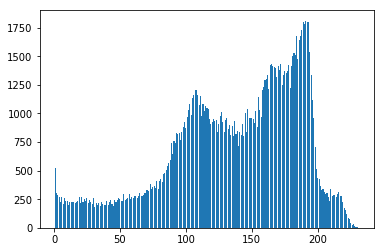

In [287]:
original_seg = cv2.imread('original_imgs/segment.jpg')
seg_img = cv2.imread('original_imgs/segment.jpg', cv2.IMREAD_GRAYSCALE)
hist_img = np.copy(seg_img)
array=[]
for i in range(hist_img.shape[0]):
    for j in range(hist_img.shape[1]):
        if hist_img[i,j]!=0: 
            array.append(hist_img[i,j])    

ounter = Counter(array)
x, y = list(ounter.keys()), list(ounter.values())
plt.bar(x, y)
plt.show()

In [288]:
output_img = np.copy(seg_img) * 1.

for i in range(seg_img.shape[0]):
    for j in range(seg_img.shape[1]):
        if seg_img[i,j] < 203: #170.0 and seg_img[i,j]<190.0:
            output_img[i,j] = 0.

In [292]:
cv2.rectangle(original_seg,(160,125),(210,168),(0,255,0),2)
cv2.rectangle(original_seg,(250,210),(305,76),(0,255,0),2)
cv2.rectangle(original_seg,(330,285),(363,20),(0,255,0),2)
cv2.rectangle(original_seg,(388,255),(425,38),(0,255,0),2)
cv2.imwrite("output/segment_detect.jpg",original_seg)

True